<div style="text-align: center; font-size: 30px;"><u><b><span style="font-weight: bold;">Used Car Price Prediction</span></b></u></div>

<img src="cars.jpg" alt="Used Cars price prediction" width="800" height="600">


# Introduction

CarDekho.com introduces a game-changing feature, "Used Car Price Prediction." We understand the uncertainty that comes with buying or selling a used car. Our advanced machine learning algorithms analyze various factors, including make, model, year, mileage, condition, and market trends, to provide you with an accurate and instant estimate of a used car's value. This tool empowers users to make transparent and confident decisions, saving time and ensuring fair transactions. With CarDekho.com's "Used Car Price Prediction," you can navigate the used car market with ease and precision

# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [5]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Feature Engineering

In [6]:
df["Price_reduced"] = df["Present_Price"] - df["Selling_Price"]
df["Price_reduced_ratio"] = np.round(df["Price_reduced"] / df["Present_Price"], 2)

# Considering the buyers are selling their vehicles in 2023
df["Years_used"] = 2023 - df["Year"]

In [7]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_reduced,Price_reduced_ratio,Years_used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,0.40,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,0.50,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,0.26,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,0.31,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,0.33,9


# Exploratory Data Analysis (EDA)

In [8]:
df.shape

(301, 12)

In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Price_reduced',
       'Price_reduced_ratio', 'Years_used'],
      dtype='object')

In [10]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_Name             301 non-null    object 
 1   Year                 301 non-null    int64  
 2   Selling_Price        301 non-null    float64
 3   Present_Price        301 non-null    float64
 4   Kms_Driven           301 non-null    int64  
 5   Fuel_Type            301 non-null    object 
 6   Seller_Type          301 non-null    object 
 7   Transmission         301 non-null    object 
 8   Owner                301 non-null    int64  
 9   Price_reduced        301 non-null    float64
 10  Price_reduced_ratio  301 non-null    float64
 11  Years_used           301 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 28.3+ KB


- All datatypes are correct according to there column so no need to convert any datatypes

In [11]:
# To know more about the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Price_reduced,Price_reduced_ratio,Years_used
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,2.967176,0.365947,9.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,4.828771,0.202416,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.030000,0.010000,5.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.390000,0.210000,7.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,1.640000,0.350000,9.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,3.350000,0.490000,11.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,57.600000,0.890000,20.000000


In [12]:
# Now let's check that if our dataset have null values or not
df.isnull().head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_reduced,Price_reduced_ratio,Years_used
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Now let's check that if our dataset have null values or not
df.isnull().sum()

Car_Name               0
Year                   0
Selling_Price          0
Present_Price          0
Kms_Driven             0
Fuel_Type              0
Seller_Type            0
Transmission           0
Owner                  0
Price_reduced          0
Price_reduced_ratio    0
Years_used             0
dtype: int64

Here from above code we first checked that is there any null values from isnull() function then we are going to take the sum of all those missing values from sum() function and the inference we now get is that there are no missing values in this dataset and we are good to go further.

In [14]:
#Check for any Duplicate values and then remove them
df.duplicated().sum()

2

In [15]:
#Remove Duplicate values
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [16]:
#Again check for duplicate 
df.duplicated().sum()

0

- Now there no Duplicate values present

a. Cardinality of the columns

In [17]:
def unique_value_count(df: pd.DataFrame):
    df_nunique = df.nunique().reset_index()
    df_nunique["dtype"] = df.dtypes.reset_index().loc[:, 0]
    df_nunique.columns = ["column", "nunique", "dtype"]
    
    display(df_nunique)

In [18]:
unique_value_count(df=df)

,column,nunique,dtype
0,Car_Name,98,object
1,Year,16,int64
2,Selling_Price,156,float64
3,Present_Price,147,float64
4,Kms_Driven,206,int64
5,Fuel_Type,3,object
6,Seller_Type,2,object
7,Transmission,2,object
8,Owner,3,int64
9,Price_reduced,258,float64


b. Distribution of numeric values

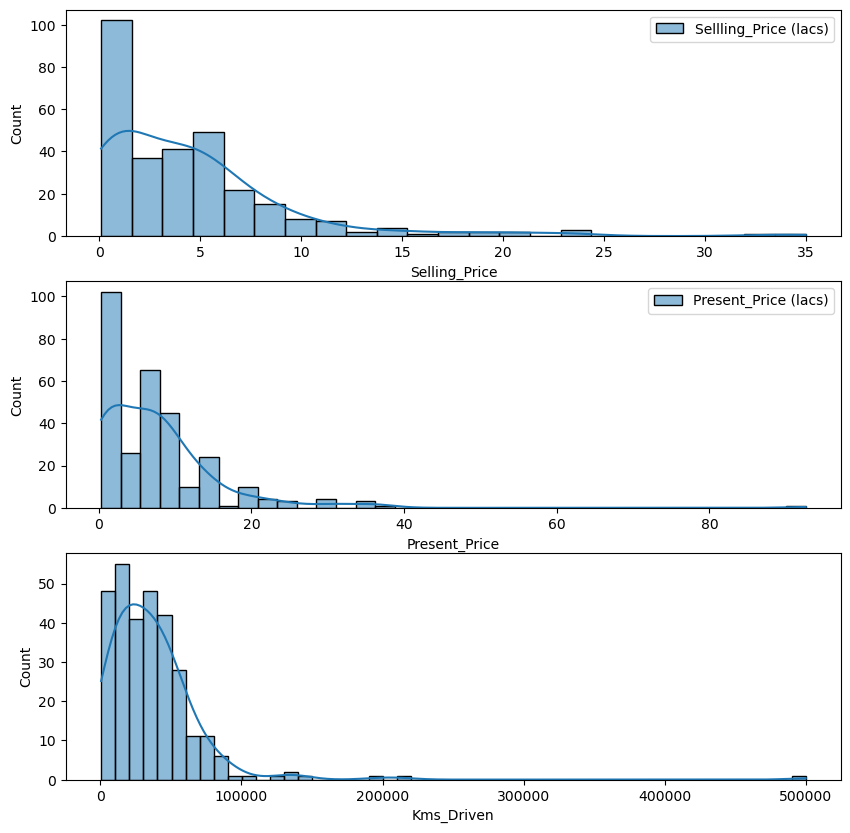

In [19]:
# Observing the distribution of numeric columns
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.histplot(x="Selling_Price", data=df, kde=True, label="Sellling_Price (lacs)")
plt.legend()

plt.subplot(3, 1, 2)
sns.histplot(x="Present_Price", data=df, kde=True, label="Present_Price (lacs)")
plt.legend()

plt.subplot(3, 1, 3)
sns.histplot(x="Kms_Driven", data=df, kde=True)

plt.show()

Observations:

- All the distributions are right-skewed
- It's interesting to see that we have more vehicles having present_price lying in 0-2 lacs
- Looks like we also have two wheelers in the dataset

In [20]:
display(df.query("Present_Price < 2").head())

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_reduced,Price_reduced_ratio,Years_used
98,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15,0.08,7
99,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,0.07,6
100,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13,0.07,6
101,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15,0.09,6
102,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12,0.08,6


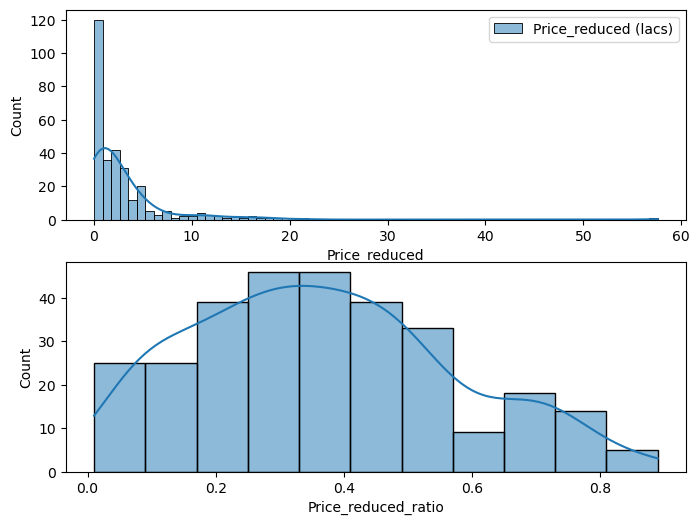

In [21]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
sns.histplot(x="Price_reduced", data=df, kde=True, label="Price_reduced (lacs)")
plt.legend()

plt.subplot(2, 1, 2)
sns.histplot(x="Price_reduced_ratio", data=df, kde=True)

plt.show()

Observations:

- The distribution of price_reduced is right-skewed
- Whereas the distribution of price_reduced_ratio seems to be normal

c. Bar plots showing count of different categories by columns

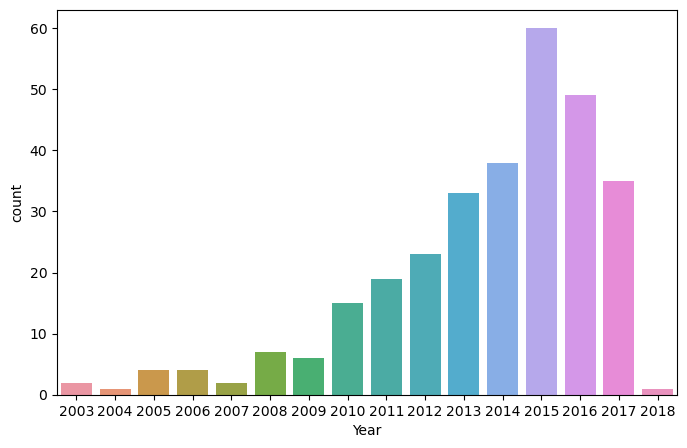

In [22]:
plt.figure(figsize=(8, 5))

sns.countplot(x="Year", data=df)
plt.show()

Observation: 
- The cars available in the dataset are mostly purchased between 2014-2017

d. Inspecting correlation between variables

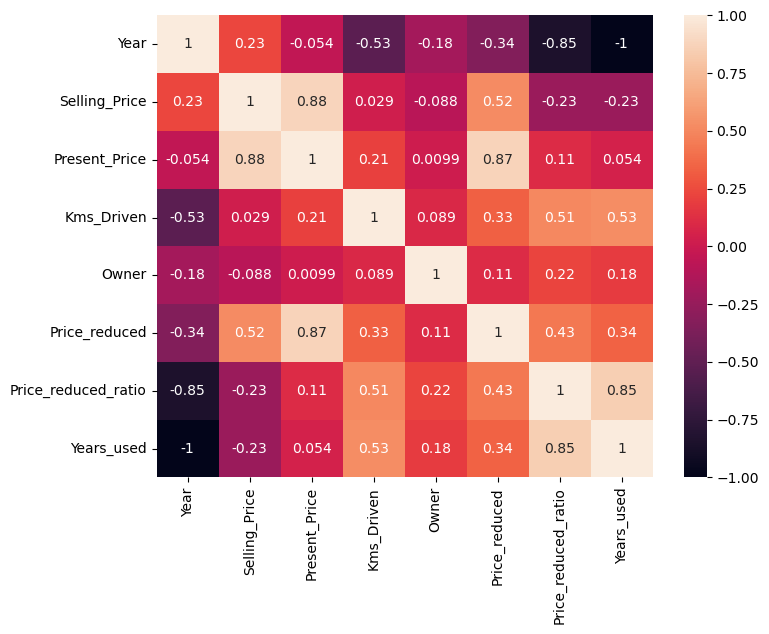

In [23]:
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Observation:
- Looks like there is a correlation between years_used and price_reduced_ratio. The hypothesis behind this correlation is with the passage of time the selling price is getting lower.

In [24]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [25]:
fuel_type = df['Fuel_Type']
seller_type = df['Seller_Type']
transmission_type = df['Transmission']
selling_price = df['Selling_Price']

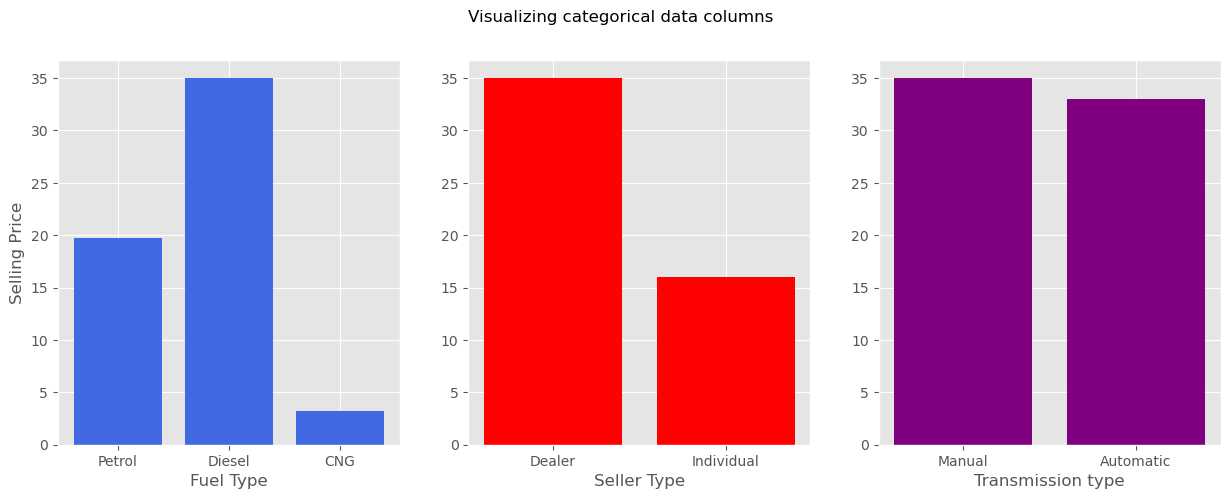

In [26]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

# Model Building

In [35]:
from sklearn.preprocessing import LabelEncoder
#converting columns that have object data to numeric
lis=['Car_Name','Year','Fuel_Type','Seller_Type','Transmission']
le=LabelEncoder()
for column in lis:
    df[column]=le.fit_transform(df[column])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_reduced,Price_reduced_ratio,Years_used
0,90,11,3.35,5.59,27000,2,0,1,0,2.24,0.40,9
1,93,10,4.75,9.54,43000,1,0,1,0,4.79,0.50,10
2,68,14,7.25,9.85,6900,2,0,1,0,2.60,0.26,6
3,96,8,2.85,4.15,5200,2,0,1,0,1.30,0.31,12
4,92,11,4.60,6.87,42450,1,0,1,0,2.27,0.33,9


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor


x = pd.DataFrame(df, columns = ['Year','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = df['Selling_Price'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((209, 7), (90, 7), (209, 1), (90, 1))

# LinearRegression

In [52]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print('train accuracy: ',np.round(LR.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(LR.score(x_test,y_test),3)*100,'% \n')
LR_y_predict=LR.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,LR_y_predict),' \n')
print('median absolute error: ',median_absolute_error(y_test,LR_y_predict),' \n')

train accuracy:  86.7 % 

test accuracy:  87.3 % 

mean absolute error:  1.2564933779548002  

median absolute error:  0.8554840127292099  



# Stochastic Gradient Descent Regression

In [53]:
SGDLR=SGDRegressor()
SGDLR.fit(x_train,y_train)
print('train accuracy: ',np.round(SGDLR.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(SGDLR.score(x_test,y_test),3)*100,'% \n')
SGD_y_predict=SGDLR.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,SGD_y_predict),' \n')
print('median absolute error: ',median_absolute_error(y_test,SGD_y_predict),' \n')

train accuracy:  -4.655190804980637e+33 % 

test accuracy:  -2.759502558365207e+33 % 

mean absolute error:  2.092960774730746e+16  

median absolute error:  1.899972628318973e+16  



# Random Forest Regressor

In [54]:
RF=RandomForestRegressor(random_state=12)
RF.fit(x_train,y_train)
print('train accuracy: ',np.round(RF.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(RF.score(x_test,y_test),3)*100,'% \n')
RF_y_predict=RF.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,RF_y_predict),' \n')
print('median absolute error: ',median_absolute_error(y_test,RF_y_predict),' \n')

train accuracy:  98.5 % 

test accuracy:  93.10000000000001 % 

mean absolute error:  0.7217344444444448  

median absolute error:  0.24100000000000021  



# Conclusion

The three regression models evaluated in this analysis exhibit varying degrees of performance. Linear Regression demonstrates decent predictive ability with reasonably high accuracy and moderate error metrics. Stochastic Gradient Descent Regressor, on the other hand, performs poorly, showing low accuracy and extremely high errors. In contrast, the Random Forest Regressor stands out as the top-performing model, delivering high accuracy, low errors, and strong generalization to unseen data. Therefore, for this specific dataset, the Random Forest Regressor is the preferred choice for making accurate predictions.